In [7]:
import pandas as pd

In [10]:
unemp_file_path = "./unemp.csv"

# Skip metadata lines and read the actual data
unemp = pd.read_csv(unemp_file_path, skiprows=6, names=["Neighborhood", "Year", "Data Format", "Unemployment Rate", "FIPS"])

In [11]:
unemp

,Neighborhood,Year,Data Format,Unemployment Rate,FIPS
0,Mott Haven,2005,Percent,0.176,201
1,Hunts Point,2005,Percent,0.176,202
2,Morrisania,2005,Percent,0.165,203
3,East Tremont,2005,Percent,0.165,206
4,Bedford Stuyvesant,2005,Percent,0.139,303
...,...,...,...,...,...
1095,Brooklyn,2022,Percent,0.068,36047
1096,Manhattan,2022,Percent,0.057,36061
1097,Queens,2022,Percent,0.053,36081
1098,Staten Island,2022,Percent,0.043,36085


In [18]:
clean_unemp = unemp.drop(columns=["Data Format"])
clean_unemp = clean_unemp.drop(columns=["FIPS"])
clean_unemp["Unemployment Rate"] = clean_unemp["Unemployment Rate"]*100

In [19]:
clean_unemp.to_csv("unemployment_rate.csv", index=False)
print("Exported to unemployment_rate.csv ✅")

Exported to unemployment_rate.csv ✅


In [20]:
file_path = "./unemployment_rate.csv"
unemp_data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
unemp_data.head()


,Neighborhood,Year,Unemployment Rate
0,Mott Haven,2005,17.6
1,Hunts Point,2005,17.6
2,Morrisania,2005,16.5
3,East Tremont,2005,16.5
4,Bedford Stuyvesant,2005,13.9


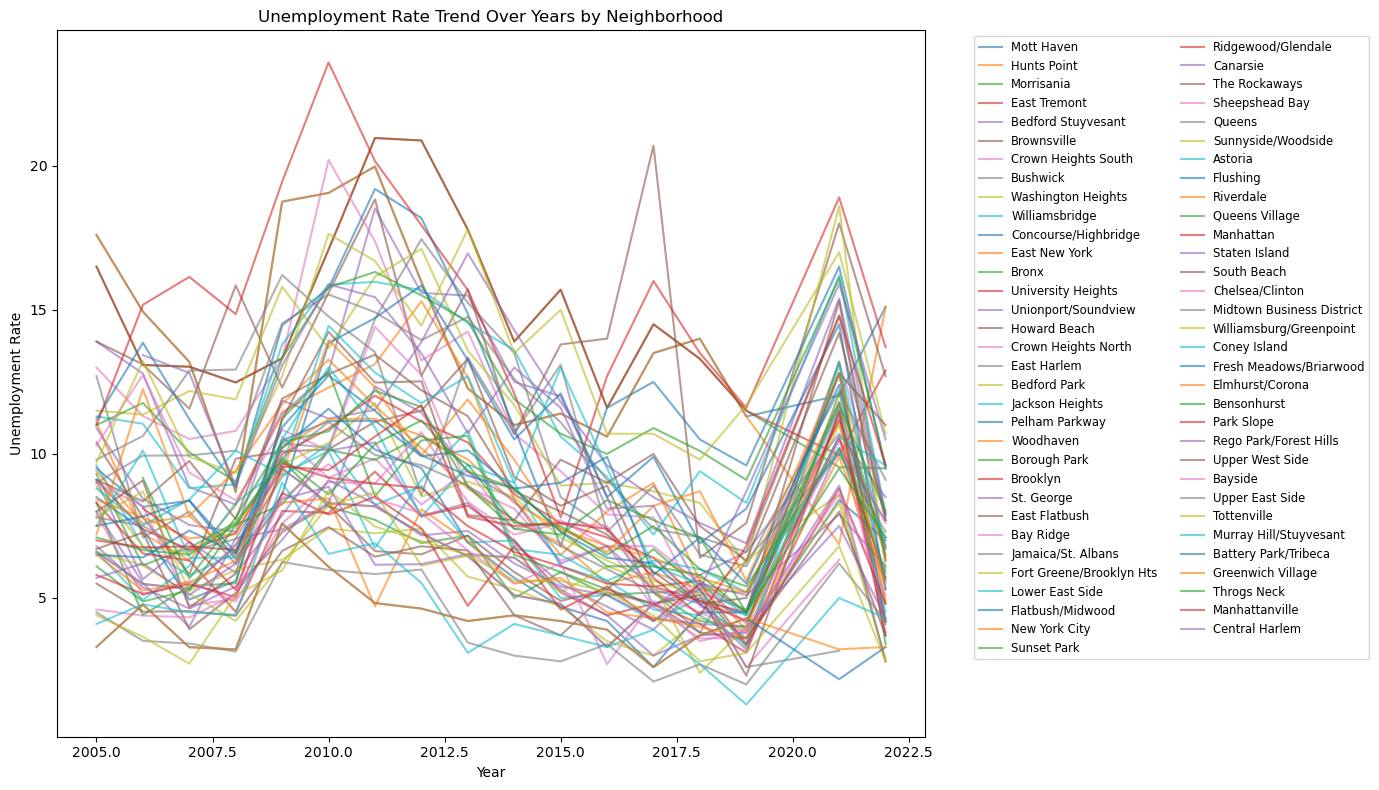

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot RTI trend lines for all neighborhoods
for neighborhood in unemp_data["Neighborhood"].unique():
    neighborhood_data = unemp_data[unemp_data["Neighborhood"] == neighborhood]
    plt.plot(neighborhood_data["Year"], neighborhood_data["Unemployment Rate"], label=neighborhood, alpha=0.6)

plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate Trend Over Years by Neighborhood")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.savefig("./unemp_rate.png", dpi=300)
plt.show()
